<a href="https://colab.research.google.com/github/matheusvanzan/ime-machine-learning/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[WIP]

Notebook baseado no seguinte artigo 

https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/

https://www.kaggle.com/datasets/sohier/calcofi

https://www.kaggle.com/code/kareem3egm/learn-machine-learning-faster-1/notebook#Linear-Regression

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

GITHUB_ROOT = 'https://raw.githubusercontent.com/matheusvanzan/ime-machine-learning/master/data/'

In [19]:
data = pd.read_csv(GITHUB_ROOT + 'bottle.csv.zip')
# data = data.dropna() # drop NULL values
data.fillna(method ='ffill', inplace = True)
data = data[['Salnty', 'T_degC']]
data.columns = ['Sal', 'Temp']

# data.insert(loc = 0, column = 'index', value = data.index)
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Sal,Temp
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


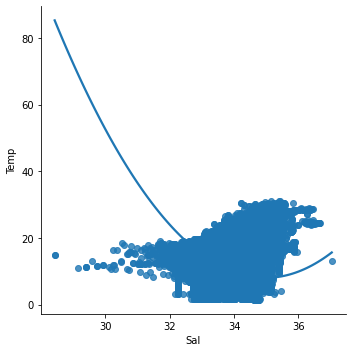

In [34]:
sns.lmplot(x ="Sal", y ="Temp", data = data, order = 2, ci = None)

0.20166745349266935


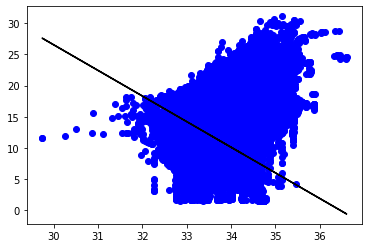

In [42]:
X = np.array(data['Sal']).reshape(-1, 1) # matriz coluna
y = np.array(data['Temp']).reshape(-1, 1)

data.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()
  
regr.fit(X_train, y_train)
score = regr.score(X_test, y_test)
print(score)

y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

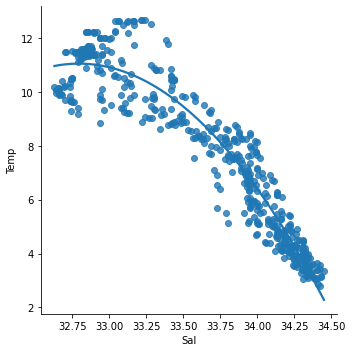

In [46]:
data500 = data[:][0:500]
  
sns.lmplot(x ="Sal", y ="Temp", data = data500, order = 2, ci = None)

0.8184010571544547


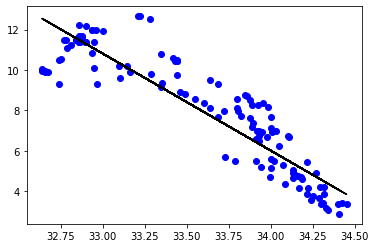

In [48]:
X = np.array(data500['Sal']).reshape(-1, 1)
y = np.array(data500['Temp']).reshape(-1, 1)
  
data500.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()